In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import glob
import numpy as np


In [5]:
''' Constants '''
img_dir = '../datasets/image-data/images'
annotations_path = '../datasets/image-data/annotations/'
img_size = 200

In [6]:
''' import images '''
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort() #We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (img_size, img_size))
    X.append(np.array(img))
    

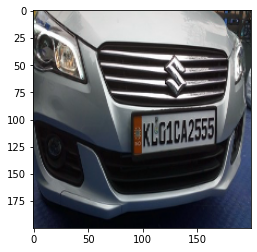

In [7]:
plt.imshow(X[0])

In [8]:
''' import annotations '''
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/img_size)
        ymin = int(dim.xpath("ymin")[0].text)/(height/img_size)
        xmax = int(dim.xpath("xmax")[0].text)/(width/img_size)
        ymax = int(dim.xpath("ymax")[0].text)/(height/img_size)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

text_files = [annotations_path+f for f in sorted(os.listdir(annotations_path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

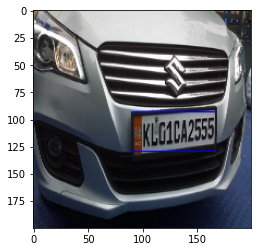

In [9]:
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

In [10]:
class plate_recognition:
    def __init__(self):
        self.image_data = None
        self.annotation_data = None
        

In [11]:
#Transforming in array
X=np.array(X)
y=np.array(y)

In [12]:
#Renormalisation
X = X / 255
y = y / 255

# Convolutional Neural Network

In [13]:
from keras.models import Sequential

from keras.layers import Dense, Flatten

from keras.applications.vgg16 import VGG16

In [14]:
# Create the model
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(img_size, img_size, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 17,099,140
Trainable params: 2,384,452
Non

In [15]:
model.compile(
    loss='mean_squared_error',
    optimizer='adam', 
    metrics=['accuracy']
)

In [16]:
train = model.fit(
    X,
    y, 
    validation_split=0.3, 
    epochs=10, 
    batch_size=32, 
    verbose=1,
    workers=8, 
    use_multiprocessing=True
)

Epoch 1/10
10/10 [==============================] - 75s 8s/step - loss: 0.0277 - accuracy: 0.4521 - val_loss: 0.0162 - val_accuracy: 0.6846
Epoch 2/10
10/10 [==============================] - 74s 8s/step - loss: 0.0124 - accuracy: 0.6106 - val_loss: 0.0142 - val_accuracy: 0.6615
Epoch 3/10
10/10 [==============================] - 74s 8s/step - loss: 0.0077 - accuracy: 0.7558 - val_loss: 0.0096 - val_accuracy: 0.7462
Epoch 4/10
10/10 [==============================] - 75s 8s/step - loss: 0.0045 - accuracy: 0.8416 - val_loss: 0.0092 - val_accuracy: 0.7385
Epoch 5/10
10/10 [==============================] - 76s 8s/step - loss: 0.0030 - accuracy: 0.8086 - val_loss: 0.0084 - val_accuracy: 0.8154
Epoch 6/10
10/10 [==============================] - 4309s 478s/step - loss: 0.0018 - accuracy: 0.9043 - val_loss: 0.0081 - val_accuracy: 0.8308
Epoch 7/10
10/10 [==============================] - 63s 6s/step - loss: 0.0012 - accuracy: 0.9208 - val_loss: 0.0080 - val_accuracy: 0.8385
Epoch 8/10
10/10

In [1]:
pip uninstall tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow-gpu

In [17]:
model.save("./models/weights/model.pb")

INFO:tensorflow:Assets written to: ./models/weights/model.pb\assets
